# 第 3 章　Pandas数据处理

In [1]:
# %% 3.2
import numpy as np
import pandas as pd

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index = ['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
data['b']

0.5

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
    index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [9]:
data[5]

0.5

In [10]:
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [12]:
population['California']

38332521

In [13]:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

In [14]:
pd.Series([2,4,6])

0    2
1    4
2    6
dtype: int64

In [15]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [16]:
pd.Series({2:'a', 3:'b', 4:'c'})

2    a
3    b
4    c
dtype: object

In [17]:
pd.Series({2:'a', 3:'b', 4:'c'}, index={4,2})

2    a
4    c
dtype: object

In [18]:
# %% 3.2.2
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [19]:
states = pd.DataFrame({'poplulation': population, 'area': area})
states

,area,poplulation
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [20]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [21]:
states.columns

Index(['area', 'poplulation'], dtype='object')

In [22]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [23]:
# (1) 通过单个 Series 对象创建
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


In [24]:
# (2) 通过字典列表创建
data = [{'a':i, 'b':2*i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [25]:
pd.DataFrame([{'a':1, 'b':2}, {'b':3, 'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [26]:
# (3) 通过 Series 对象字典创建
pd.DataFrame({'poplulation': population, 'area': area})

,area,poplulation
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [27]:
# (4) 通过 NumPy 二维数组创建
pd.DataFrame(np.random.rand(3,2),
            columns = ['foo', 'bar'],
            index = ['a', 'b', 'c'])

,foo,bar
a,0.732568,0.661308
b,0.164905,0.966081
c,0.638873,0.428983


In [28]:
# (5) 通过 NumPy 结构化数组创建
a = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
a

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [29]:
pd.DataFrame(a)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


In [31]:
# 3.2.3
ind = pd.Index([2,3,5,7,11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [32]:
ind[1]

3

In [33]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [34]:
ind.size, ind.shape, ind.ndim, ind.dtype

(5, (5,), 1, dtype('int64'))

In [35]:
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])
indA & indB

Int64Index([3, 5, 7], dtype='int64')

In [36]:
indA | indB

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [37]:
indA ^ indB

Int64Index([1, 2, 9, 11], dtype='int64')

In [38]:
indA.intersection(indB)

Int64Index([3, 5, 7], dtype='int64')

In [39]:
# %% 3.3　数据取值与选择

In [40]:
# 3.3.1
# 1. Series as dict
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
data['b']

0.5

In [41]:
'a' in data

True

In [42]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [43]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [44]:
data['e'] =1.23
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.23
dtype: float64

In [45]:
# 2. series as one dimension array
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [46]:
# ，当使用显式索引（即 data['a':'c']）作切片时，结果包含最后一个索引；
#而当使用隐式索引（即 data[0:2]）作切片时，结果不包含最后一个索引
data[0:2]

a    0.25
b    0.50
dtype: float64

In [47]:
data [(data>0.3) & (data<0.8)]

b    0.50
c    0.75
dtype: float64

In [48]:
data[['a', 'e']]

a    0.25
e    1.23
dtype: float64

In [49]:
# 3. loc、iloc和ix
data = pd.Series(['a', 'b', 'c'], index=[1,3,5])
data

1    a
3    b
5    c
dtype: object

In [50]:
data[1]

'a'

In [52]:
data[1:3] # 隐式索引

3    b
5    c
dtype: object

In [53]:
data.loc[1], data.loc[1:3]

('a', 1    a
 3    b
 dtype: object)

In [54]:
data.iloc[1]

'b'

In [55]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [58]:
# 3.3.2
area = pd.Series({'California': 423967, 'Texas': 695662,
'New York': 141297, 'Florida': 170312,
'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127, 'Florida': 19552860,
'Illinois': 12882135})
data = pd.DataFrame({'area':area,  'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [59]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [60]:
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [61]:
data.area is data['area']

True

In [62]:
data.pop is data['pop']

False

In [64]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [66]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01]])

In [67]:
data.T

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [68]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [69]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [70]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [71]:
data.loc[:'Illions', :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [72]:
data.ix[:3, :'pop']

C:\Users\Jinjia\Anaconda3\envs\Python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [73]:
data.loc[data.density>100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [74]:
data.iloc[0,2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [75]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [76]:
data[1:3]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [77]:
data[data.density > 100]

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


In [78]:
# %% 3.4　Pandas数值运算方法

In [80]:
# 3.4.1
import pandas as pd
import numpy as np
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [84]:
df = pd.DataFrame(rng.randint(0,10,(3,4)),columns = ['a','b', 'c', 'd'])
df

,a,b,c,d
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [85]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [86]:
np.sin(df * np.pi / 4)

,a,b,c,d
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [88]:
# 3.42
# 01. Series 索引对齐
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127}, name = 'population')
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [90]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [91]:
a = pd.Series([2,4,6], index=[0,1,2])
b = pd.Series([1,3,5], index=[1,2,3])
a + b

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [93]:
a.add(b, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [94]:
# 02. DataFrame索引对齐
a = pd.DataFrame(rng.randint(0, 20, (2,2)),
                columns = list('AB'))
a

,A,B
0,1,11
1,5,1


In [97]:
b = pd.DataFrame(rng.randint(0,10, (3, 3)),
                columns = list('BAC'))
b

,B,A,C
0,3,8,2
1,4,2,6
2,4,8,6


In [98]:
a + b

,A,B,C
0,9.0,14.0,NaN
1,7.0,5.0,NaN
2,NaN,NaN,NaN


In [101]:
fill = a.stack().mean()
fill

4.5

In [102]:
a.add(b, fill_value=fill)

,A,B,C
0,9.0,14.0,6.5
1,7.0,5.0,10.5
2,12.5,8.5,10.5


In [105]:
# 3.4.3
a = rng.randint(10, size=(3,4))
a

array([[2, 0, 3, 1],
       [7, 3, 1, 5],
       [5, 9, 3, 5]])

In [106]:
a - a[0]

array([[ 0,  0,  0,  0],
       [ 5,  3, -2,  4],
       [ 3,  9,  0,  4]])

In [107]:
df = pd.DataFrame(a, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,5,3,-2,4
2,3,9,0,4


In [109]:
df.subtract(df['R'], axis=0 )

,Q,R,S,T
0,2,0,3,1
1,4,0,-2,2
2,-4,0,-6,-4


In [110]:
halfrow = df.iloc[0, ::2]
halfrow

Q    2
S    3
Name: 0, dtype: int32

In [111]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,5.0,NaN,-2.0,NaN
2,3.0,NaN,0.0,NaN


In [112]:
df

,Q,R,S,T
0,2,0,3,1
1,7,3,1,5
2,5,9,3,5


In [113]:
# %% 3.5　处理缺失值

In [114]:
# 3.5.2
import numpy as np
import pandas as pd
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [115]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
227 ms ± 21.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

dtype = int
2.81 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [116]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [117]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [118]:
vals2.sum()

nan

In [120]:
np.nansum(vals2), np.nanmin(vals2)

(8.0, 1.0)

In [122]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    3.0
2    2.0
3    NaN
dtype: float64

In [123]:
np.array([1, None, 3, np.nan])

array([1, None, 3, nan], dtype=object)

In [124]:
x = pd.Series(range(2), dtype = int)
x

0    0
1    1
dtype: int32

In [125]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [127]:
# 3.5.3
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [128]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [129]:
data.dropna()

0        1
2    hello
dtype: object

In [130]:
df = pd.DataFrame([[1, np.nan, 2],
                    [2, 3, 5],
                    [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [131]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [132]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


In [133]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [134]:
df.dropna(axis = 1, how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [136]:
df.dropna(axis=0, thresh = 3) # 非缺失值的最少个数

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [138]:
data = pd.Series([1, np.nan, 2, None, 3], index = list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [139]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [140]:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [141]:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [142]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [143]:
df.fillna(method='ffill', axis =1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [144]:
# %% 3.6　层级索引

In [1]:
# 3.6.1 
import pandas as pd
import numpy as np
index = [('California', 2000), ('California', 2010),
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]
pop = pd.Series(populations, index = index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [147]:
pop[('California', 2010):('Texas', 2010)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [148]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [149]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [150]:
pop=pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [151]:
pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [152]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [153]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [154]:
pop_df = pd.DataFrame({'total': pop,
'under18': [9267089, 9284094,
4687374, 4318033,
5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [155]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [156]:
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [157]:
# 3.6.2
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=['data1', 'data2'])
df

data1     data2
a 1  0.105402  0.917690
  2  0.959530  0.527222
b 1  0.201880  0.413224
  2  0.887327  0.315086

In [160]:
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [163]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [164]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [165]:
pd.MultiIndex.from_product([['a', 'b'], [1,2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [166]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [167]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [168]:
pop.unstack()

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [14]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                            names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                    names=['subject', 'type'])
data = np.round(np.random.randn(4,6), 1)
data[:, ::2] *= 10
data += 37
data

array([[58. , 36.5, 50. , 37.7, 37. , 37. ],
       [22. , 38. , 21. , 35.3, 47. , 36.2],
       [42. , 35.7, 38. , 37.4, 30. , 37.7],
       [37. , 37.1, 33. , 36.2, 61. , 38.3]])

In [15]:
health_data = pd.DataFrame(data, index = index, columns = columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      58.0  36.5  50.0  37.7  37.0  37.0
     2      22.0  38.0  21.0  35.3  47.0  36.2
2014 1      42.0  35.7  38.0  37.4  30.0  37.7
     2      37.0  37.1  33.0  36.2  61.0  38.3

In [172]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      52.0  36.8
     2      16.0  36.6
2014 1      45.0  34.0
     2      41.0  36.4

In [2]:
# 3.6.3
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [4]:
index = pd.MultiIndex.from_tuples(index)
pop=pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [5]:
pop['California', 2000]

33871648

In [6]:
pop['California']

2000    33871648
2010    37253956
dtype: int64

In [7]:
pop['California':'New York']

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [10]:
pop[:,2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [11]:
pop[pop>22000000]

California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [12]:
pop[['California', 'Texas']]

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [16]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      58.0  36.5  50.0  37.7  37.0  37.0
     2      22.0  38.0  21.0  35.3  47.0  36.2
2014 1      42.0  35.7  38.0  37.4  30.0  37.7
     2      37.0  37.1  33.0  36.2  61.0  38.3

In [17]:
health_data['Guido', 'HR']

year  visit
2013  1        50.0
      2        21.0
2014  1        38.0
      2        33.0
Name: (Guido, HR), dtype: float64

In [18]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      58.0  36.5
     2      22.0  38.0

In [19]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        58.0
      2        22.0
2014  1        42.0
      2        37.0
Name: (Bob, HR), dtype: float64

In [21]:
idx = pd.IndexSlice
health_data.loc[idx[:,1], idx[:,'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,58.0,50.0,37.0
2014,1,42.0,38.0,30.0


In [26]:
idx[:,:]

(slice(None, None, None), slice(None, None, None))

In [29]:
# 3.6.4
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.535642
      2      0.855558
c     1      0.002988
      2      0.550488
b     1      0.930810
      2      0.762377
dtype: float64

In [31]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [32]:
data = data.sort_index()
data

char  int
a     1      0.535642
      2      0.855558
b     1      0.930810
      2      0.762377
c     1      0.002988
      2      0.550488
dtype: float64

In [33]:
data['a':'b']

char  int
a     1      0.535642
      2      0.855558
b     1      0.930810
      2      0.762377
dtype: float64

In [35]:
pop.unstack(level=0)

,California,New York,Texas
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [36]:
pop.unstack(level=1)

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [37]:
pop.unstack(level=0).stack()

2000  California    33871648
      New York      18976457
      Texas         20851820
2010  California    37253956
      New York      19378102
      Texas         25145561
dtype: int64

In [46]:
pop_flat = pop.reset_index(name = 'population')
pop_flat

,level_0,level_1,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [62]:
pop_flat.columns = (['state', 'year', 'population'])
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [64]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [65]:
# 3.6.5
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      58.0  36.5  50.0  37.7  37.0  37.0
     2      22.0  38.0  21.0  35.3  47.0  36.2
2014 1      42.0  35.7  38.0  37.4  30.0  37.7
     2      37.0  37.1  33.0  36.2  61.0  38.3

In [66]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob        Guido         Sue      
type       HR   Temp    HR  Temp    HR  Temp
year                                        
2013     40.0  37.25  35.5  36.5  42.0  36.6
2014     39.5  36.40  35.5  36.8  45.5  38.0

In [67]:
data_mean.mean(axis =1, level='type')

type,HR,Temp
year,,
2013,39.166667,36.783333
2014,40.166667,37.066667


# 3.7　合并数据集：Concat与Append操作

In [68]:
import pandas as pd
import numpy as np

In [84]:
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind]
           for c in cols}
    #print(type(data))
    return pd.DataFrame(data, ind)
make_df('abc', range(3))

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2


In [74]:
# 3.7.1
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
x = [[1, 2],
[3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [76]:
np.concatenate([x, x], axis=0)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [79]:
data = {c: [str(c) + str(i) for i in range(3)]
           for c in 'abc'}
data

{'a': ['a0', 'a1', 'a2'], 'b': ['b0', 'b1', 'b2'], 'c': ['c0', 'c1', 'c2']}

In [80]:
data['a']

['a0', 'a1', 'a2']

In [81]:
# 3.7.2
ser1 = pd.Series(['a', 'b', 'c'], index=[1,2,3])
ser2 = pd.Series(['d', 'e', 'f'], index=[4,5,6])
pd.concat([ser1, ser2])

1    a
2    b
3    c
4    d
5    e
6    f
dtype: object

In [85]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [94]:
# df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis=1))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [96]:
x = make_df('ab', [0,1])
y = make_df('ab', [2,3])
y.index = x.index
pd.concat([x, y])

,a,b
0,a0,b0
1,a1,b1
0,a2,b2
1,a3,b3


In [97]:
try:
    pd.concat([x,y], verify_integrity=True)
except ValueError as e:
    print('ValueError:', e)

ValueError: Indexes have overlapping values: [0, 1]


In [102]:
print(x); print(y); print(pd.concat([x,y], ignore_index=True))

    a   b
0  a0  b0
1  a1  b1
    a   b
0  a2  b2
1  a3  b3
    a   b
0  a0  b0
1  a1  b1
2  a2  b2
3  a3  b3


In [104]:
print(x); print(y); print(pd.concat([x,y], keys=['x', 'y']))

    a   b
0  a0  b0
1  a1  b1
    a   b
0  a2  b2
1  a3  b3
      a   b
x 0  a0  b0
  1  a1  b1
y 0  a2  b2
  1  a3  b3


In [106]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [107]:
print(df5); print(df6); print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


# 3.8　合并数据集：合并与连接

In [2]:
import pandas as pd
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [3]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [4]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [6]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [7]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],
'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [9]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [10]:
# 3.3.3
print(df1); print(df2); pd.merge(df1,df2, on='employee')

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [11]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [12]:
pd.merge(df1, df3, left_on='employee', right_on='name')

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [19]:
pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [22]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [23]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [24]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [28]:
print(df1a); print(df3); pd.merge(df1a, df3, left_index=True, right_on = 'name')

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


In [30]:
# 3.8.4
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
'food': ['fish', 'beans', 'bread']},
columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
'drink': ['wine', 'beer']},
columns=['name', 'drink'])
print(df6); print(df7); pd.merge(df6, df7)

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer


,name,food,drink
0,Mary,bread,wine


In [31]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [32]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [34]:
# 3.8.5
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [3, 1, 4, 2]})
print(df8); print(df9); pd.merge(df8, df9, on='name')

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2


,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [36]:
pd.merge(df8, df9, on='name', suffixes=['_L', '_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [37]:
# 3.8.6
fdir = r'c:\tmp\data'
pop = pd.read_csv( fdir + '\state-population.csv')
areas = pd.read_csv( fdir + '\state-areas.csv')
abbrevs = pd.read_csv( fdir + '\state-abbrevs.csv')
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [52]:
dfpa = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation').drop('state/region', axis=1)
dfpa.head()

,ages,year,population,state,abbreviation
0,under18,2012,1117489.0,Alabama,AL
1,total,2012,4817528.0,Alabama,AL
2,under18,2010,1130966.0,Alabama,AL
3,total,2010,4785570.0,Alabama,AL
4,under18,2011,1125763.0,Alabama,AL


In [48]:
dfall = pd.merge(dfpa, areas)
dfall.columns = ['ages', 'year', 'population', 'state', 'abbreviation', 'area']
dfall.head()

,ages,year,population,state,abbreviation,area
0,under18,2012,1117489.0,Alabama,AL,52423
1,total,2012,4817528.0,Alabama,AL,52423
2,under18,2010,1130966.0,Alabama,AL,52423
3,total,2010,4785570.0,Alabama,AL,52423
4,under18,2011,1125763.0,Alabama,AL,52423


In [49]:
dfall['density'] = dfall['population'] / dfall['area']
dfall.head()

,ages,year,population,state,abbreviation,area,density
0,under18,2012,1117489.0,Alabama,AL,52423,21.316769
1,total,2012,4817528.0,Alabama,AL,52423,91.897221
2,under18,2010,1130966.0,Alabama,AL,52423,21.573851
3,total,2010,4785570.0,Alabama,AL,52423,91.287603
4,under18,2011,1125763.0,Alabama,AL,52423,21.474601


In [51]:
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1)
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [53]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [54]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [57]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [58]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [59]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [60]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [61]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [63]:
final.loc[final['area (sq. mi)'].isnull(), 'state'].unique()

array(['United States'], dtype=object)

In [65]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [70]:
data2010 = final.query("year == 2000 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
28,AL,total,2000,4452173.0,Alabama,52423.0
68,AK,total,2000,627963.0,Alaska,656425.0
124,AZ,total,2000,5160586.0,Arizona,114006.0
162,AR,total,2000,2678588.0,Arkansas,53182.0
220,CA,total,2000,33987977.0,California,163707.0


In [71]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8412.441176
Puerto Rico             1084.098151
New Jersey               966.592639
Rhode Island             679.785113
Connecticut              615.399892
dtype: float64

In [72]:
density.tail()

state
South Dakota    9.800755
North Dakota    9.080434
Montana         6.146192
Wyoming         5.053262
Alaska          0.956641
dtype: float64

# 3.9　累计与分组

In [8]:
# 3.9.1
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [74]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [75]:
len(planets)

1035

In [77]:
# 3.9.2
import numpy as np
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [78]:
ser.sum()

2.811925491708157

In [79]:
ser.mean()

0.5623850983416314

In [80]:
df = pd.DataFrame({'a':rng.rand(5), 'b':rng.rand(5)})
df

,a,b
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [81]:
df.mean()

a    0.477888
b    0.443420
dtype: float64

In [82]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [83]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [84]:
# 3.9.3
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [87]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [90]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [99]:
for (method, group) in planets.groupby('method'):
    print("{a:30s} shape={b}".format(a=method, b=group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [100]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

In [2]:
import pandas as pd
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [102]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [103]:
df.groupby('key').aggregate({'data1':'min', 'data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [111]:
def filter_func(x):
    return x['data2'].std()>4

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [112]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [113]:
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [116]:
df.groupby('key').transform(lambda x: x-x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [118]:
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()
    return x
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


In [119]:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,data1,data2
0,7,17
1,4,3
2,4,7


In [120]:
df.groupby(df['key']).sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


In [4]:
df2 = df.set_index('key')
df2

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


In [5]:
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
consonant,12,19
vowel,3,8


In [6]:
df2.groupby(str.lower).mean()

,data1,data2
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [7]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [13]:
decade = 10 * (planets['year'] // 10 )
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# 3.10　数据透视表

In [22]:
# 3.10.1
import numpy as np
import pandas as sns
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
# 3.10.2
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [24]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [25]:
# 3.10.3 
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [26]:
age = pd.cut(titanic['age'], [0, 18, 55, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 55]  0.970149  0.915254  0.413793
       (55, 80]  1.000000  0.000000  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 55]  0.428571  0.064103  0.137755
       (55, 80]  0.157895  0.166667  0.000000

In [30]:
fare = pd.qcut(titanic['fare'], 3)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 8.662]           (8.662, 26.0]                      \
class                     First     Third         First    Second     Third   
sex    age                                                                    
female (0, 18]              NaN  0.700000           NaN  1.000000  0.583333   
       (18, 55]             NaN  0.523810           1.0  0.895833  0.413793   
       (55, 80]             NaN       NaN           NaN  0.000000  1.000000   
male   (0, 18]              NaN  0.166667           NaN  0.500000  0.500000   
       (18, 55]             0.0  0.132450           0.0  0.078125  0.102564   
       (55, 80]             NaN  0.000000           0.0  0.200000       NaN   

fare            (26.0, 512.329]                   
class                     First Second     Third  
sex    age                                        
female (0, 18]         0.909091    1.0  0.111111  
       (18, 55]        0.969231    1.0  0.125000  
       (55, 80]        1.000000    NaN       NaN  
male   (0, 18]         0.800000    0.8  0.052632  
       (18, 55]        0.458333    0.0  0.500000  
       (55, 80]        0.166667    0.0       NaN

In [35]:
titanic.pivot_table(index='sex', columns='class', 
                   aggfunc = {'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [36]:
titanic.pivot_table('survived', index='sex', 
                    columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [37]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [39]:
# 3.10.4
csv = r'C:\tmp\data\births.csv'
births = pd.read_csv(csv)
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [40]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index ='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

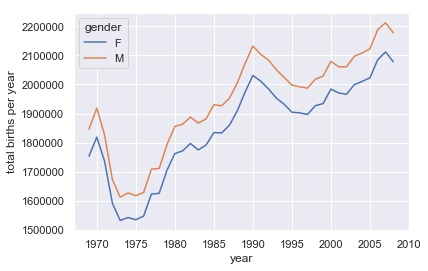

In [44]:
%matplotlib inline
import matplotlib.pyplot as  plt
sns.set()
births.pivot_table('births', index ='year', columns='gender', 
                   aggfunc='sum').plot()
plt.ylabel('total births per year')

In [47]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
mu, sig

(4814.0, 689.31)

In [52]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

In [53]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month +
                births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

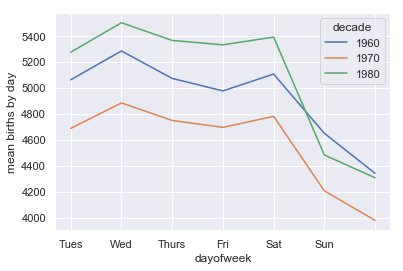

In [54]:
import matplotlib as mpl
births.pivot_table('births', index='dayofweek', columns='decade',
                  aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 
                           'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [55]:
births_by_date = births.pivot_table('births', [births.index.month, 
                                    births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [56]:
births_by_date.index=[pd.datetime(2012, month, day)
                     for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


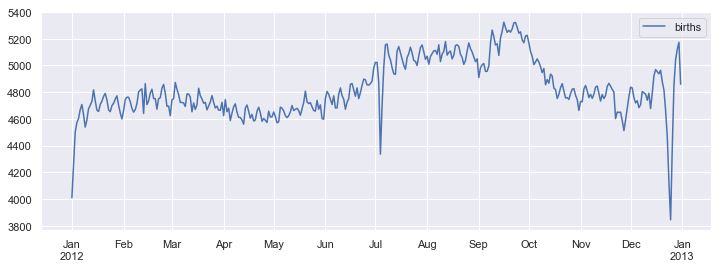

In [57]:
fig, ax = plt.subplots(figsize = (12,4))
births_by_date.plot(ax = ax)

# 3.11　向量化字符串操作

In [58]:
# 3.11.1
import numpy as np
x = np.array([2,3,5,7,11,13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [59]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [63]:
[s.upper() for s in data]

['PETER', 'PAUL', 'MARY', 'GUIDO']

In [64]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [66]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [68]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [69]:
names.str.lower()

0    peter
1     paul
2     None
3     mary
4    guido
dtype: object

In [71]:
# 3.11.2
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [72]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [73]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [74]:
monte.str.extract('([A-Za-z]+)')

C:\Users\Jinjia\Anaconda3\envs\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [75]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [76]:
monte.str.slice(0,3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [77]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [78]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [80]:
monte.str.split().str[-1]

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [81]:
monte.str.rsplit().str[0]

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [82]:
full_monte = pd.DataFrame({'name': monte,
'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
'B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [83]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [88]:
# 3.11.3
try:
    recipes = pd.read_json(r'c:\tmp\data\recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Could not reserve memory block


In [91]:
with open(r'c:\tmp\data\recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

(2, 12)

In [2]:
import codecs as co
import pandas as pd
with co.open(r'c:\tmp\data\recipeitems-latest.json', 'r', 'utf-8') as f:
    data = (line.strip() for line in f)
    data_jason = "[{0}]".format(','.join(data))
recipes = pd.read_json(data_jason)    
#recipes.shape

In [5]:
recipes.shape

(50000, 17)

In [6]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
cookTime                                                          PT30M
creator                                                             NaN
dateModified                                                        NaN
datePublished                                                2013-03-11
description           Late Saturday afternoon, after Marlboro Man ha...
image                 http://static.thepioneerwoman.com/cooking/file...
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
name                                    Drop Biscuits and Sausage Gravy
prepTime                                                          PT10M
recipeCategory                                                      NaN
recipeInstructions                                                  NaN
recipeYield                                                          12
source                                                  thepione

In [7]:
recipes.ingredients.str.len().describe()

count    50000.000000
mean       218.946400
std        142.018828
min          0.000000
25%        125.000000
50%        187.000000
75%        269.000000
max       3247.000000
Name: ingredients, dtype: float64

In [8]:
recipes.description.str.contains('[Bb]reakfast').sum()

1117

In [11]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

1126

In [12]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

0

In [13]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [14]:
import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                            for spice in spice_list))
spice_df.head()

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [15]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

1

In [16]:
recipes.name[selection.index]

2069    All cremat with a Little Gem, dandelion and wa...
Name: name, dtype: object

#  3.12　处理时间序列

In [1]:
# 3.12.1
from datetime import datetime
datetime(year=2005, month=7, day=4)

datetime.datetime(2005, 7, 4, 0, 0)

In [18]:
from dateutil import parser
date = parser.parse('4th of july, 2015')
date

datetime.datetime(2015, 7, 4, 0, 0)

In [20]:
date.strftime('%a'), date.strftime('%A')

('Sat', 'Saturday')

In [22]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [23]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [26]:
np.datetime64('2015-07-04'), np.datetime64('2015-07-04 12:00:00')

(numpy.datetime64('2015-07-04'), numpy.datetime64('2015-07-04T12:00:00'))

In [27]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [28]:
date = pd.to_datetime("4th of July, 2015")
date, date.strftime('%A')

(Timestamp('2015-07-04 00:00:00'), 'Saturday')

In [29]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [31]:
# 3.12.2
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
'2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [32]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [33]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [ ]:
# 3.12.3
# Just for test